In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=8,3
sns.set_theme(style="whitegrid", palette="dark")

In [2]:
supply=pd.read_csv(r'C:\Users\admin\Downloads\archive\supply_chain_data.csv')

In [3]:
supply

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


In [4]:
supply.shape

(100, 24)

In [5]:
supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [6]:
supply.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [7]:
supply.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [8]:
supply.columns=['Product_type', 'SKU', 'Price', 'Availability','Number_of_products_sold', 'Revenue_generated', 'Customer_demographics','Stock_levels', 'Lead_times', 'Order_quantities', 'Shipping_times','Shipping_carriers', 'Shipping_costs', 'Supplier_name', 'Location','Lead_time', 'Production_volumes', 'Manufacturing_lead_time','Manufacturing_costs', 'Inspection_results', 'Defect_rates','Transportation_modes', 'Routes', 'Costs']

In [9]:
len(supply.columns)

24

In [10]:
supply.describe()

,Price,Availability,Number_of_products_sold,Revenue_generated,Stock_levels,Lead_times,Order_quantities,Shipping_times,Shipping_costs,Lead_time,Production_volumes,Manufacturing_lead_time,Manufacturing_costs,Defect_rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [11]:
supply.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,100.0,49.462461,31.168193,1.699976,19.597823,51.239831,77.198228,99.171329
Availability,100.0,48.400000,30.743317,1.000000,22.750000,43.500000,75.000000,100.000000
Number_of_products_sold,100.0,460.990000,303.780074,8.000000,184.250000,392.500000,704.250000,996.000000
Revenue_generated,100.0,5776.048187,2732.841744,1061.618523,2812.847151,6006.352023,8253.976921,9866.465458
Stock_levels,100.0,47.770000,31.369372,0.000000,16.750000,47.500000,73.000000,100.000000
Lead_times,100.0,15.960000,8.785801,1.000000,8.000000,17.000000,24.000000,30.000000
Order_quantities,100.0,49.220000,26.784429,1.000000,26.000000,52.000000,71.250000,96.000000
Shipping_times,100.0,5.750000,2.724283,1.000000,3.750000,6.000000,8.000000,10.000000
Shipping_costs,100.0,5.548149,2.651376,1.013487,3.540248,5.320534,7.601695,9.929816
Lead_time,100.0,17.080000,8.846251,1.000000,10.000000,18.000000,25.000000,30.000000


In [12]:
supply.dtypes

Product_type                object
SKU                         object
Price                      float64
Availability                 int64
Number_of_products_sold      int64
Revenue_generated          float64
Customer_demographics       object
Stock_levels                 int64
Lead_times                   int64
Order_quantities             int64
Shipping_times               int64
Shipping_carriers           object
Shipping_costs             float64
Supplier_name               object
Location                    object
Lead_time                    int64
Production_volumes           int64
Manufacturing_lead_time      int64
Manufacturing_costs        float64
Inspection_results          object
Defect_rates               float64
Transportation_modes        object
Routes                      object
Costs                      float64
dtype: object

In [13]:
supply.head()

,Product_type,SKU,Price,Availability,Number_of_products_sold,Revenue_generated,Customer_demographics,Stock_levels,Lead_times,Order_quantities,...,Location,Lead_time,Production_volumes,Manufacturing_lead_time,Manufacturing_costs,Inspection_results,Defect_rates,Transportation_modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


<Axes: xlabel='Availability', ylabel='Density'>

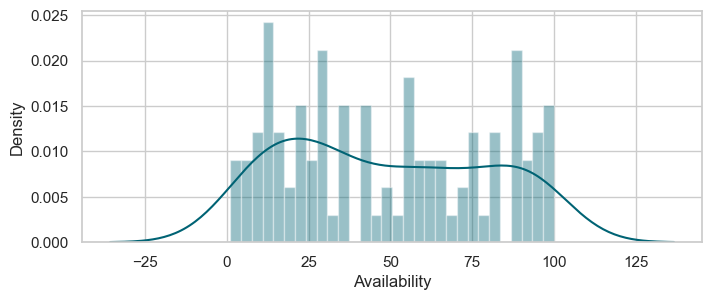

In [14]:
sns.distplot(supply.Availability,color='c',bins=30)

<Axes: xlabel='Number_of_products_sold', ylabel='Density'>

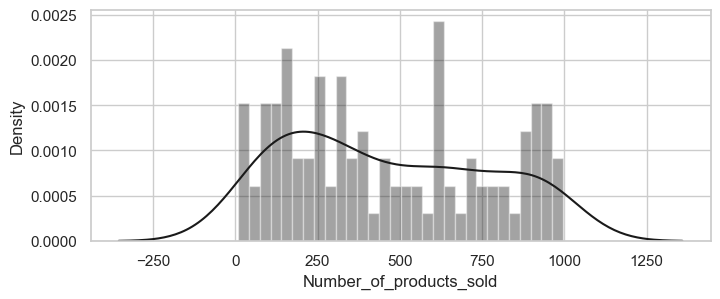

In [15]:
sns.distplot(supply.Number_of_products_sold	,color='k',bins=30)

<Axes: xlabel='Revenue_generated', ylabel='Density'>

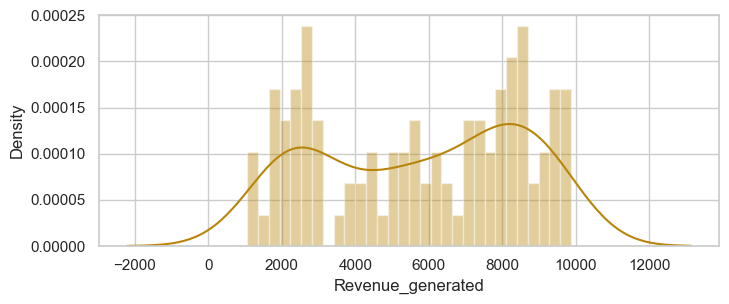

In [16]:
sns.distplot(supply.Revenue_generated,color='y',bins=30)

<Axes: xlabel='Stock_levels', ylabel='Density'>

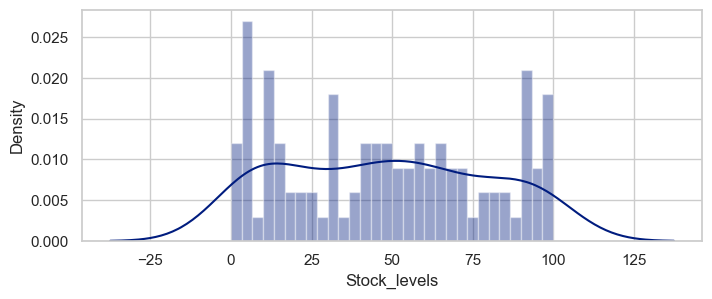

In [17]:
sns.distplot(supply.Stock_levels,color='b',bins=30)

<Axes: xlabel='Lead_times', ylabel='Density'>

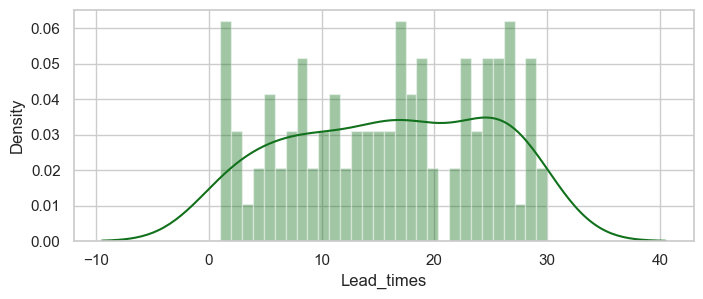

In [18]:
sns.distplot(supply.Lead_times,color='g',bins=30)

<Axes: xlabel='Order_quantities', ylabel='Density'>

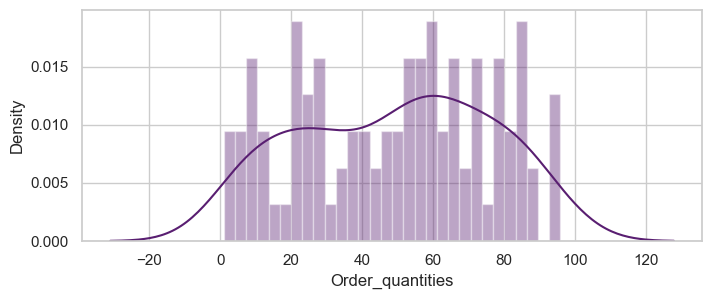

In [19]:
sns.distplot(supply.Order_quantities,color='m',bins=30)

<Axes: xlabel='Production_volumes', ylabel='Density'>

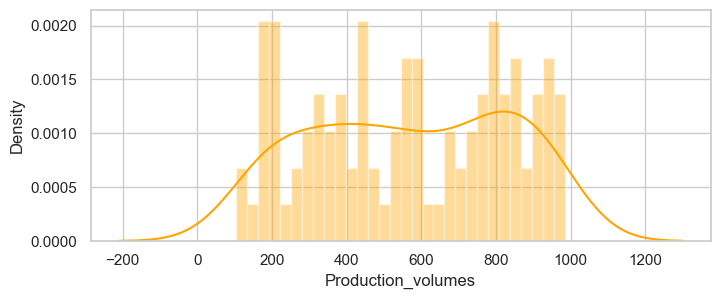

In [20]:
sns.distplot(supply.Production_volumes,color='orange',bins=30)

<Axes: xlabel='Manufacturing_lead_time', ylabel='Density'>

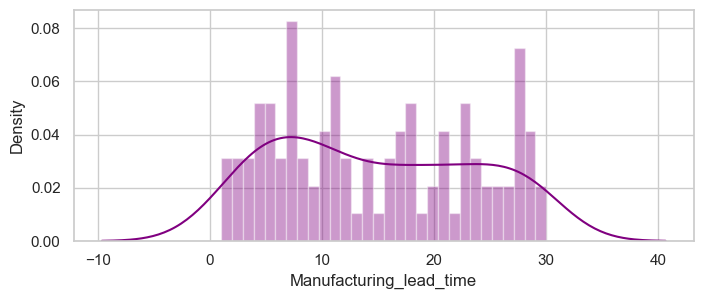

In [21]:
sns.distplot(supply.Manufacturing_lead_time,color='purple',bins=30)

<Axes: xlabel='Manufacturing_costs', ylabel='Density'>

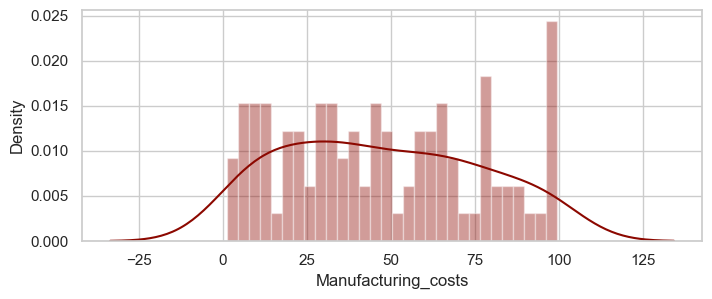

In [22]:
sns.distplot(supply.Manufacturing_costs,color='r',bins=30)

<Axes: xlabel='Costs', ylabel='Density'>

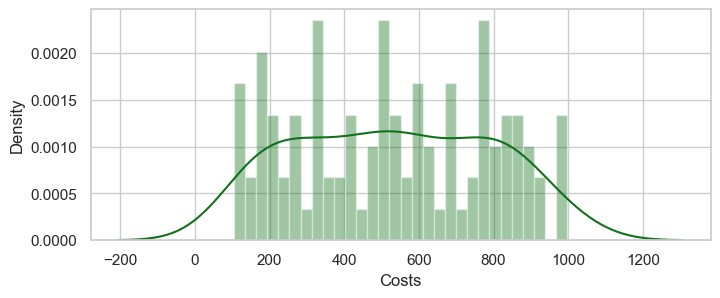

In [23]:
sns.distplot(supply.Costs,color='g',bins=30)

<Axes: xlabel='Defect_rates', ylabel='Density'>

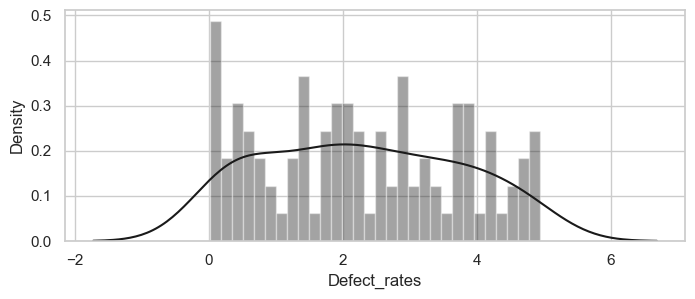

In [24]:
sns.distplot(supply.Defect_rates,color='k',bins=30)

In [25]:
supply.head()

,Product_type,SKU,Price,Availability,Number_of_products_sold,Revenue_generated,Customer_demographics,Stock_levels,Lead_times,Order_quantities,...,Location,Lead_time,Production_volumes,Manufacturing_lead_time,Manufacturing_costs,Inspection_results,Defect_rates,Transportation_modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


<Axes: xlabel='Customer_demographics', ylabel='count'>

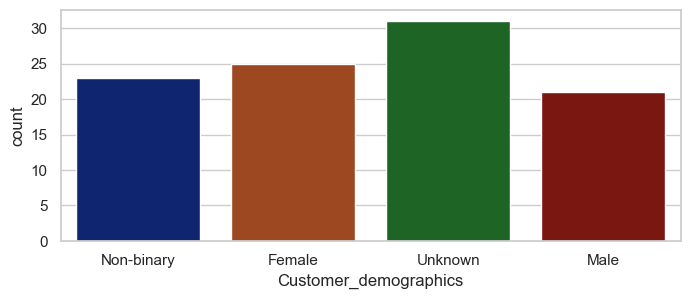

In [26]:
sns.countplot(data=supply,x='Customer_demographics',palette='dark')

<Axes: xlabel='Product_type', ylabel='count'>

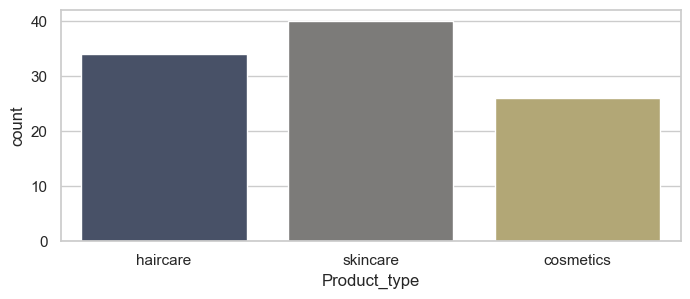

In [27]:
sns.countplot(data=supply,x='Product_type',palette='cividis')

<Axes: xlabel='Inspection_results', ylabel='count'>

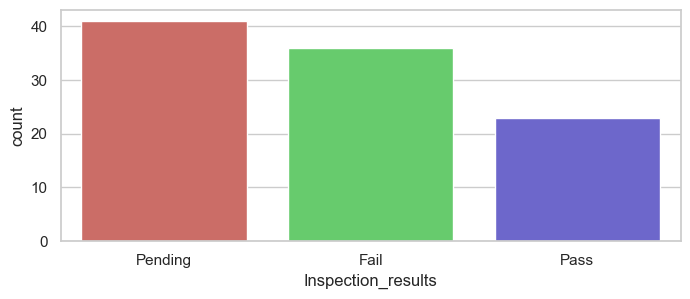

In [28]:
sns.countplot(data=supply,x='Inspection_results',palette='hls')

<Axes: xlabel='Transportation_modes', ylabel='count'>

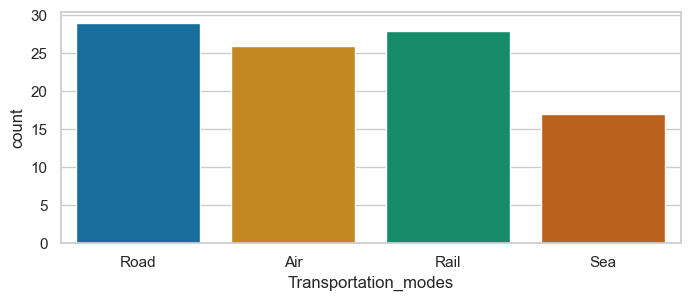

In [29]:
sns.countplot(data=supply,x='Transportation_modes',palette='colorblind')

<Axes: xlabel='Transportation_modes', ylabel='count'>

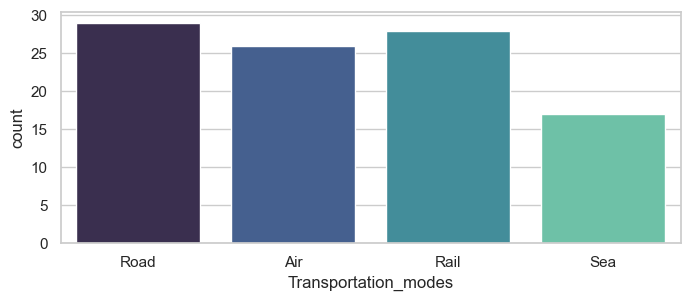

In [30]:
sns.countplot(data=supply,x='Transportation_modes',palette='mako')

<Axes: xlabel='Routes', ylabel='count'>

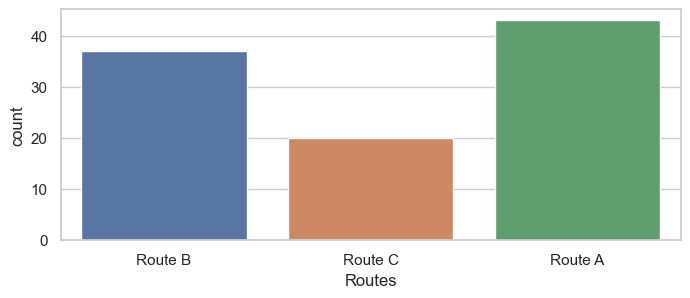

In [31]:
sns.countplot(data=supply,x='Routes',palette='deep')

<Axes: xlabel='Location', ylabel='count'>

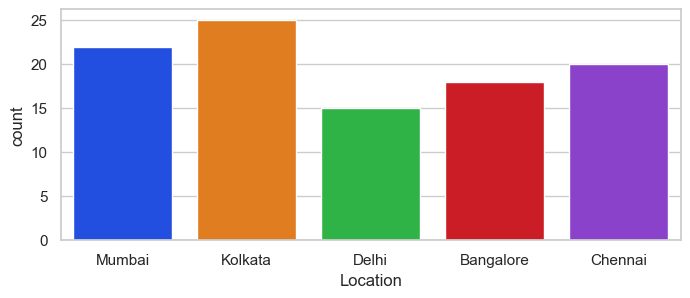

In [32]:
sns.countplot(data=supply,x='Location',palette='bright')

<Axes: xlabel='Shipping_carriers', ylabel='count'>

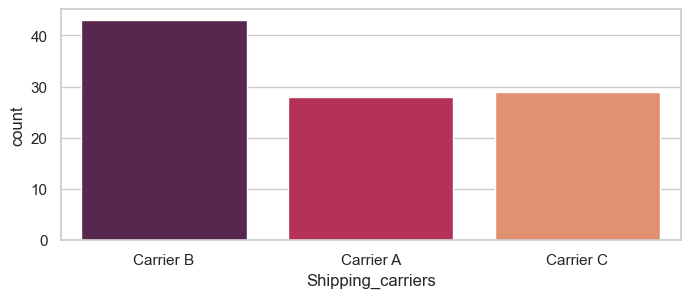

In [33]:
sns.countplot(data=supply,x='Shipping_carriers',palette='rocket')

<Axes: xlabel='Product_type', ylabel='count'>

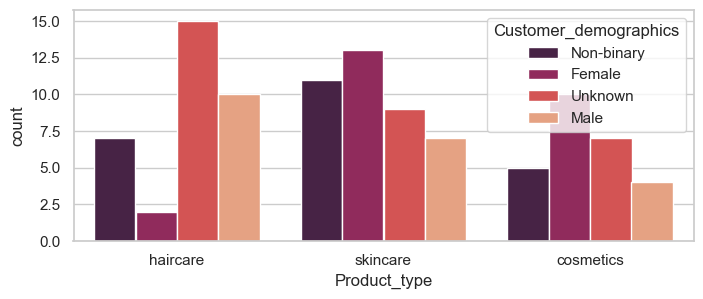

In [34]:
sns.countplot(data=supply,x='Product_type',hue='Customer_demographics',palette='rocket')

<Axes: xlabel='Shipping_carriers', ylabel='count'>

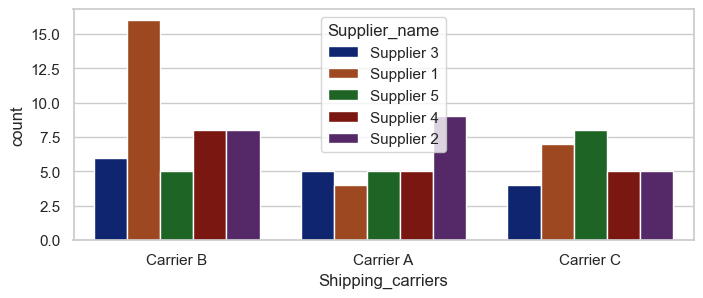

In [35]:
sns.countplot(data=supply,x='Shipping_carriers',hue='Supplier_name',palette='dark')

<Axes: xlabel='Location', ylabel='count'>

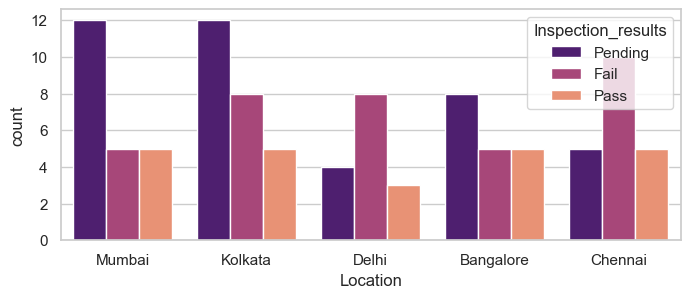

In [36]:
sns.countplot(data=supply,x='Location',hue='Inspection_results',palette='magma')

<Axes: xlabel='Transportation_modes', ylabel='count'>

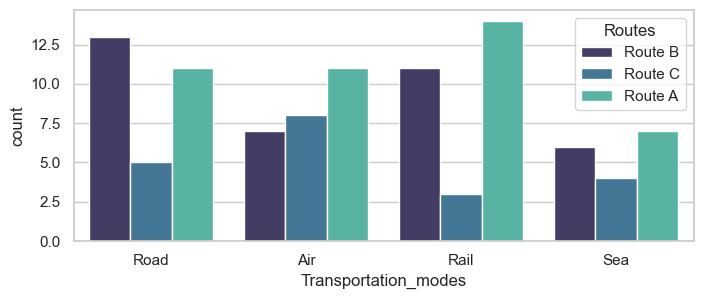

In [37]:
sns.countplot(data=supply,x='Transportation_modes',hue='Routes',palette='mako')

<Axes: xlabel='Shipping_carriers', ylabel='count'>

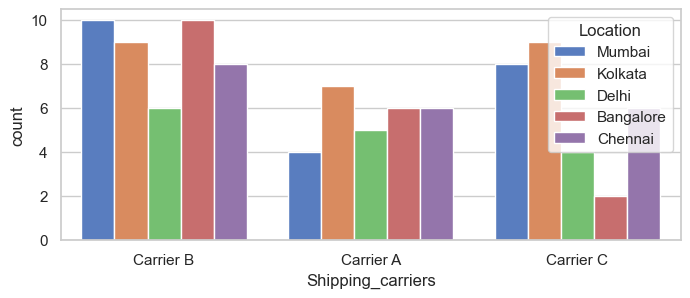

In [38]:
sns.countplot(data=supply,x='Shipping_carriers',hue='Location',palette='muted')

<Axes: xlabel='Product_type', ylabel='count'>

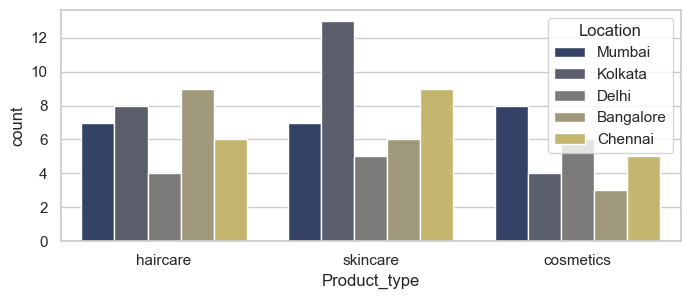

In [39]:
sns.countplot(data=supply,x='Product_type',hue='Location',palette='cividis')

<Axes: xlabel='Location', ylabel='count'>

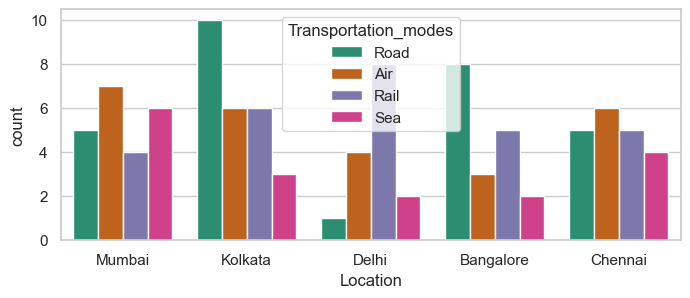

In [40]:
sns.countplot(data=supply,x='Location',hue='Transportation_modes',palette='Dark2')

In [41]:
supply.head()

,Product_type,SKU,Price,Availability,Number_of_products_sold,Revenue_generated,Customer_demographics,Stock_levels,Lead_times,Order_quantities,...,Location,Lead_time,Production_volumes,Manufacturing_lead_time,Manufacturing_costs,Inspection_results,Defect_rates,Transportation_modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


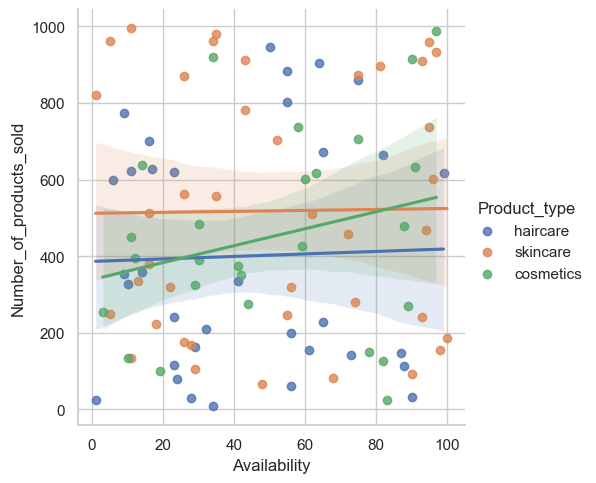

In [42]:
sns.lmplot(data=supply,x='Availability',y='Number_of_products_sold',palette='deep',hue='Product_type')

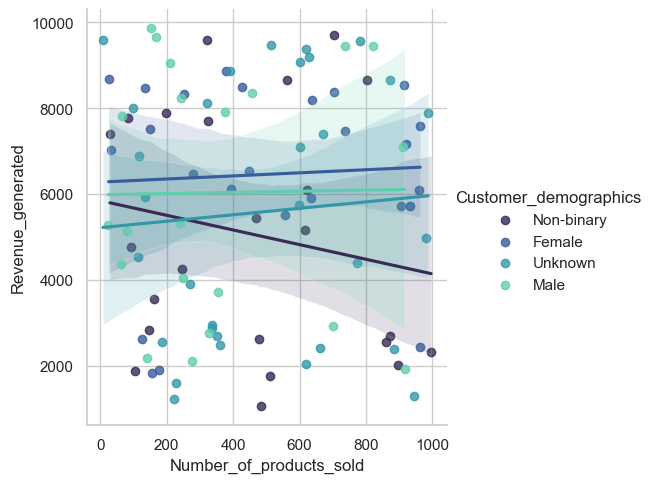

In [43]:
sns.lmplot(data=supply,x='Number_of_products_sold',y='Revenue_generated',palette='mako',hue='Customer_demographics')

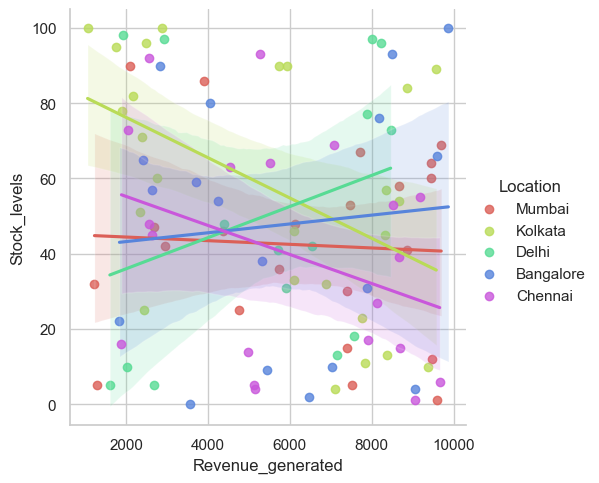

In [44]:
sns.lmplot(data=supply,x='Revenue_generated',y='Stock_levels',palette='hls',hue='Location')

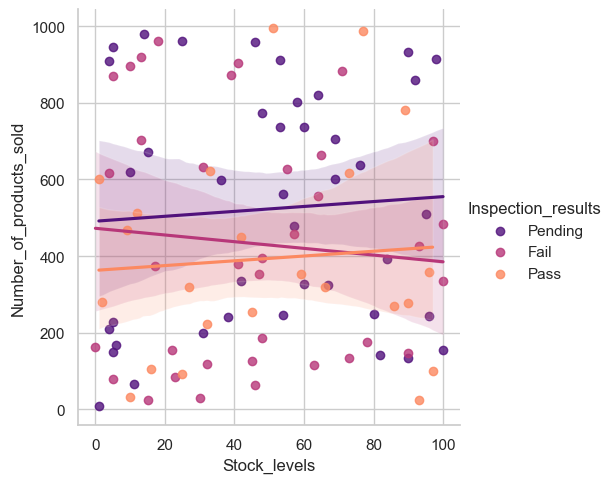

In [45]:
sns.lmplot(data=supply,x='Stock_levels',y='Number_of_products_sold',palette='magma',hue='Inspection_results')

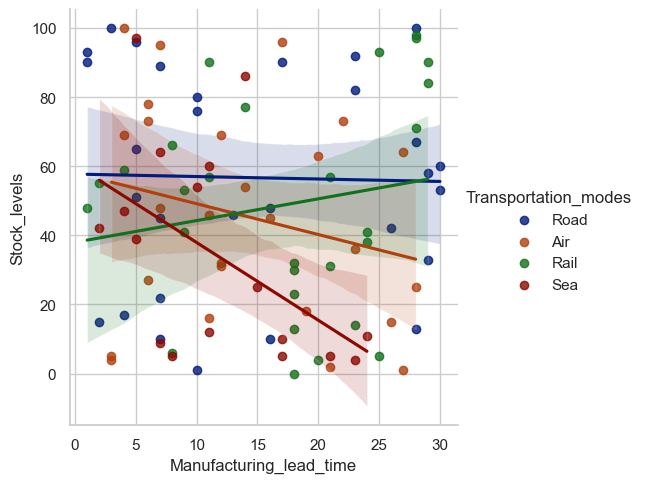

In [46]:
sns.lmplot(data=supply,x='Manufacturing_lead_time',y='Stock_levels',palette='dark',hue='Transportation_modes')

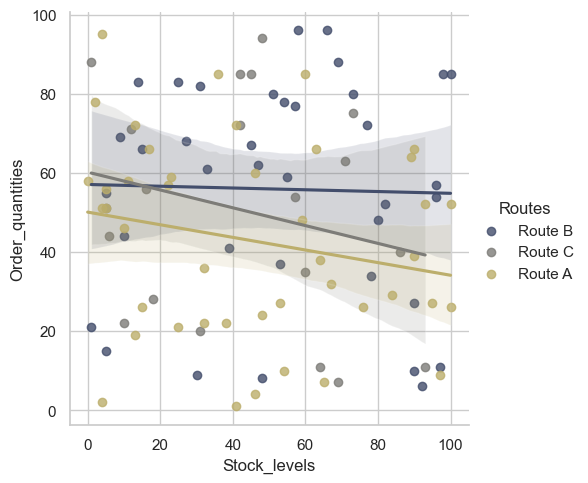

In [47]:
sns.lmplot(data=supply,x='Stock_levels',y='Order_quantities',palette='cividis',hue='Routes')

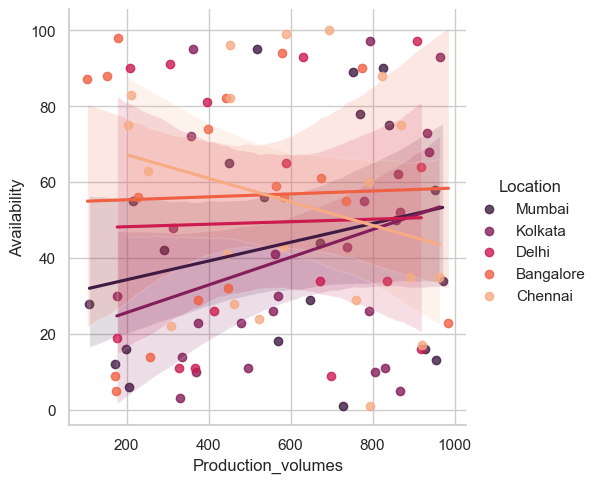

In [48]:
sns.lmplot(data=supply,x='Production_volumes',y='Availability',palette='rocket',hue='Location')

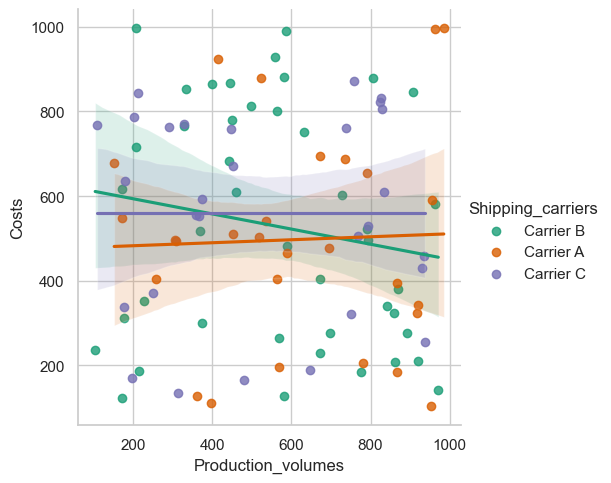

In [49]:
sns.lmplot(data=supply,x='Production_volumes',y='Costs',palette='Dark2',hue='Shipping_carriers')

In [50]:
supply.head()

,Product_type,SKU,Price,Availability,Number_of_products_sold,Revenue_generated,Customer_demographics,Stock_levels,Lead_times,Order_quantities,...,Location,Lead_time,Production_volumes,Manufacturing_lead_time,Manufacturing_costs,Inspection_results,Defect_rates,Transportation_modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


<Axes: xlabel='Product_type', ylabel='Availability'>

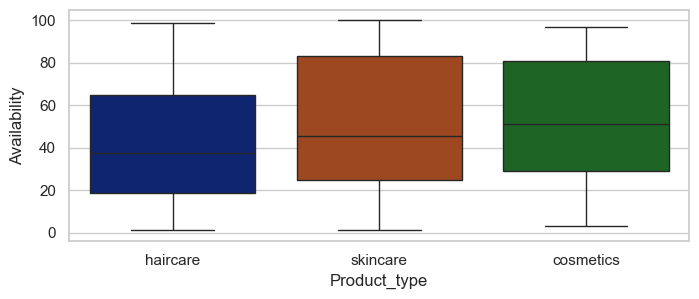

In [51]:
sns.boxplot(data=supply,x='Product_type',y='Availability',palette='dark')

<Axes: xlabel='Customer_demographics', ylabel='Number_of_products_sold'>

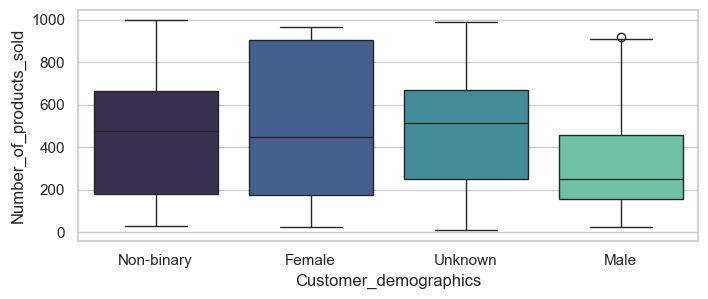

In [52]:
sns.boxplot(data=supply,x='Customer_demographics',y='Number_of_products_sold',palette='mako')

<Axes: xlabel='Location', ylabel='Revenue_generated'>

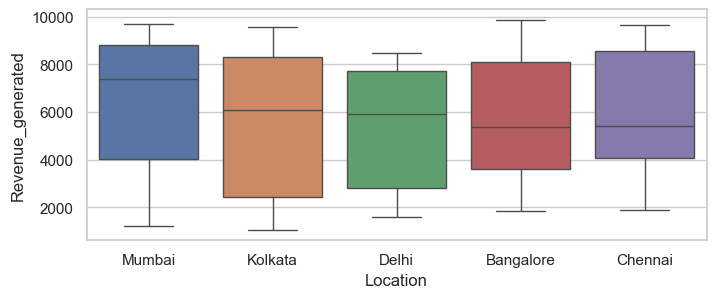

In [53]:
sns.boxplot(data=supply,x='Location',y='Revenue_generated',palette='deep')

<Axes: xlabel='Routes', ylabel='Production_volumes'>

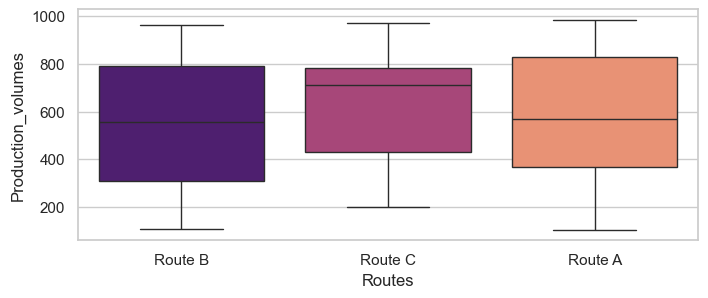

In [54]:
sns.boxplot(data=supply,x='Routes',y='Production_volumes',palette='magma')

<Axes: xlabel='Inspection_results', ylabel='Manufacturing_costs'>

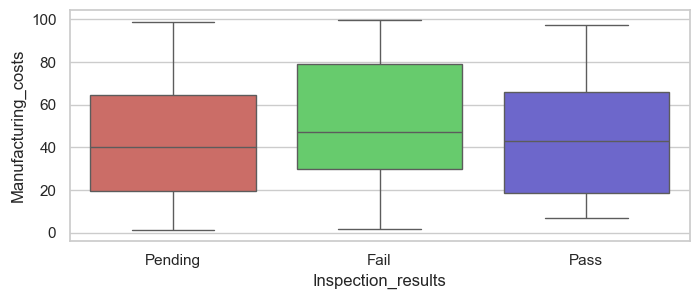

In [55]:
sns.boxplot(data=supply,x='Inspection_results',y='Manufacturing_costs',palette='hls')

<Axes: xlabel='Transportation_modes', ylabel='Costs'>

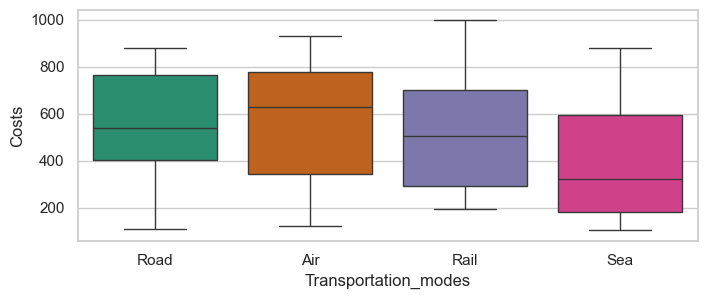

In [56]:
sns.boxplot(data=supply,x='Transportation_modes',y='Costs',palette='Dark2')

<Axes: xlabel='Shipping_carriers', ylabel='Manufacturing_lead_time'>

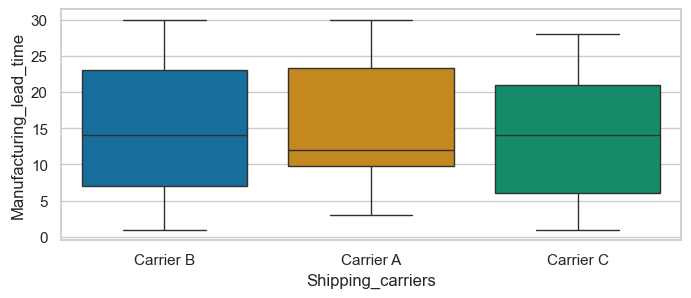

In [57]:
sns.boxplot(data=supply,x='Shipping_carriers',y='Manufacturing_lead_time',palette='colorblind')

In [58]:
supply.head()

,Product_type,SKU,Price,Availability,Number_of_products_sold,Revenue_generated,Customer_demographics,Stock_levels,Lead_times,Order_quantities,...,Location,Lead_time,Production_volumes,Manufacturing_lead_time,Manufacturing_costs,Inspection_results,Defect_rates,Transportation_modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


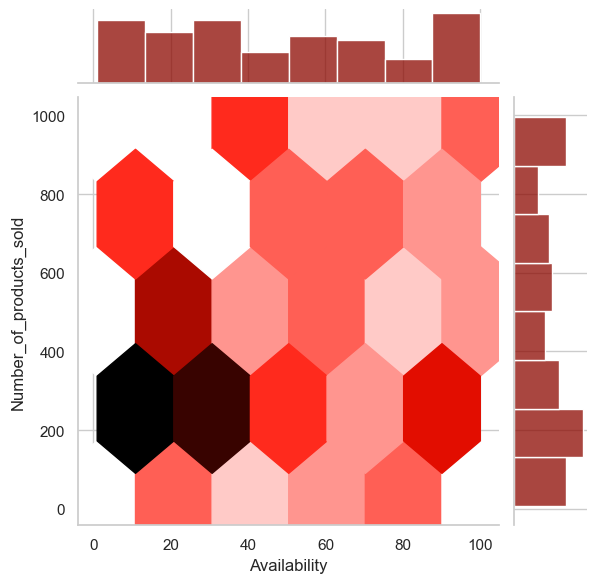

In [59]:
sns.jointplot(data=supply,x='Availability',y='Number_of_products_sold',color='r',kind='hex')

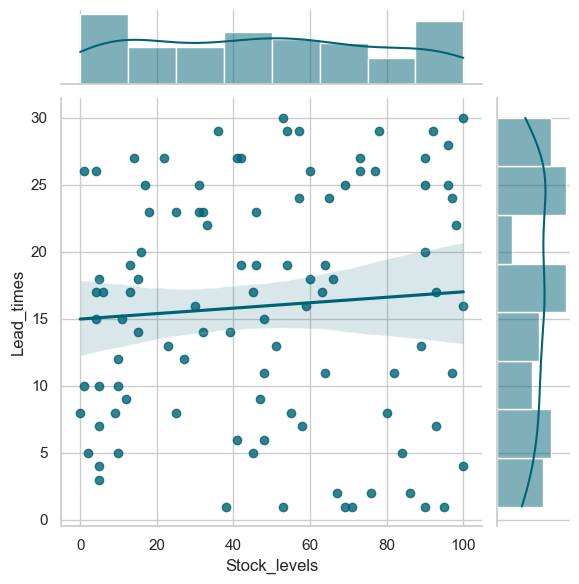

In [60]:
sns.jointplot(data=supply,x='Stock_levels',y='Lead_times',color='c',kind='reg')

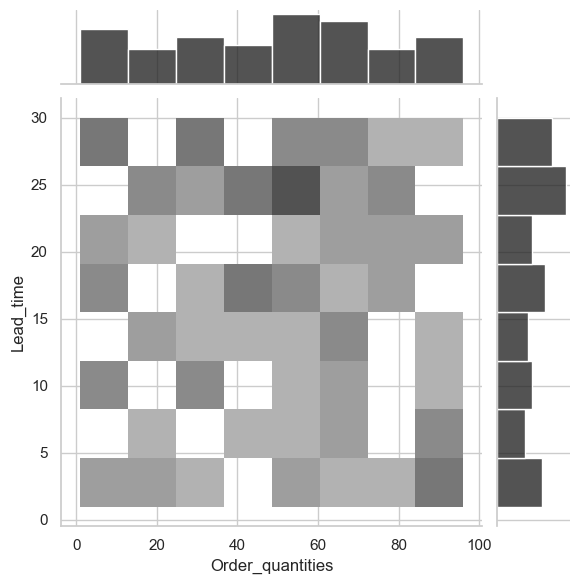

In [61]:
sns.jointplot(data=supply,x='Order_quantities',y='Lead_time',color='k',kind='hist')

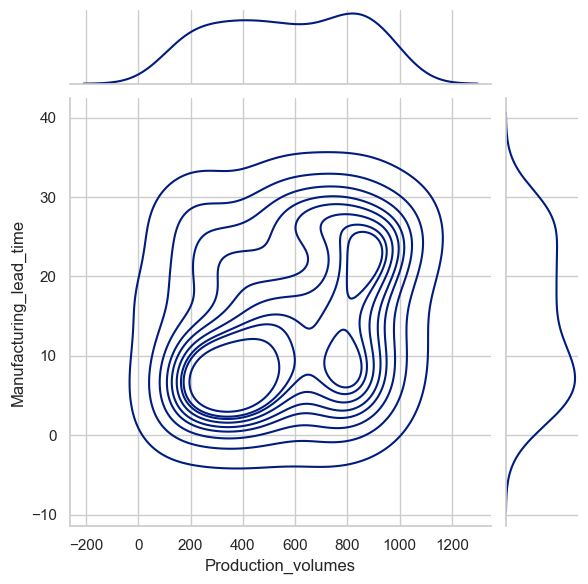

In [62]:
sns.jointplot(data=supply,x='Production_volumes',y='Manufacturing_lead_time',color='b',kind='kde')

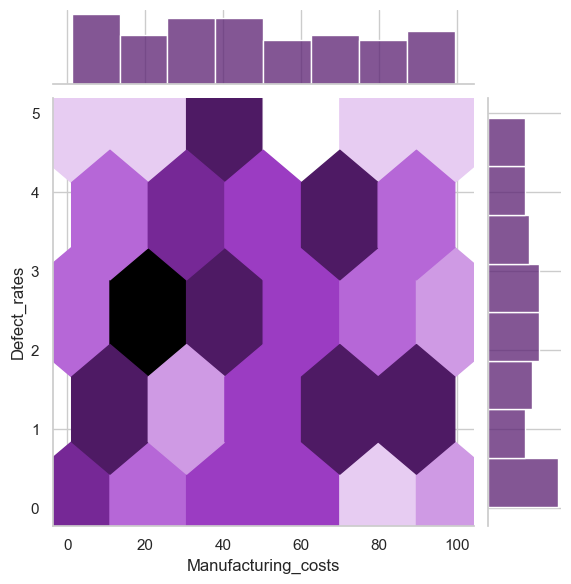

In [63]:
sns.jointplot(data=supply,x='Manufacturing_costs',y='Defect_rates',color='m',kind='hex')

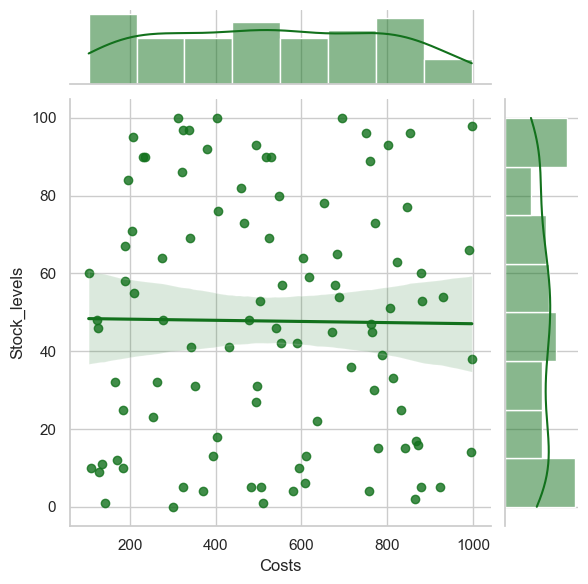

In [64]:
sns.jointplot(data=supply,x='Costs',y='Stock_levels',color='g',kind='reg')

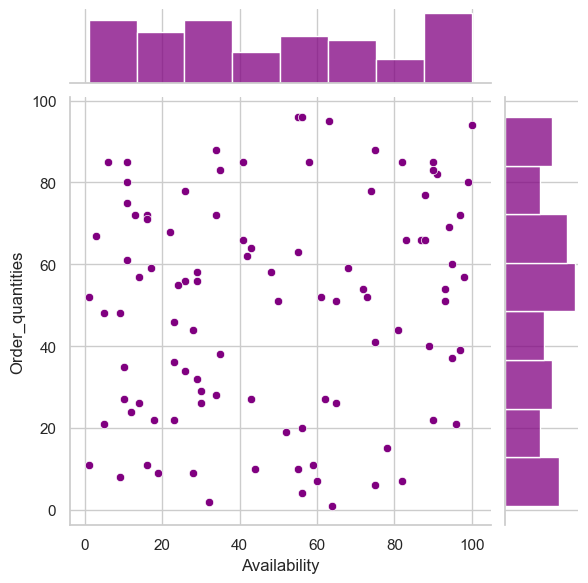

In [65]:
sns.jointplot(data=supply,x='Availability',y='Order_quantities',color='purple',kind='scatter')

In [66]:
supply.head()

,Product_type,SKU,Price,Availability,Number_of_products_sold,Revenue_generated,Customer_demographics,Stock_levels,Lead_times,Order_quantities,...,Location,Lead_time,Production_volumes,Manufacturing_lead_time,Manufacturing_costs,Inspection_results,Defect_rates,Transportation_modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


<Axes: xlabel='Availability', ylabel='Density'>

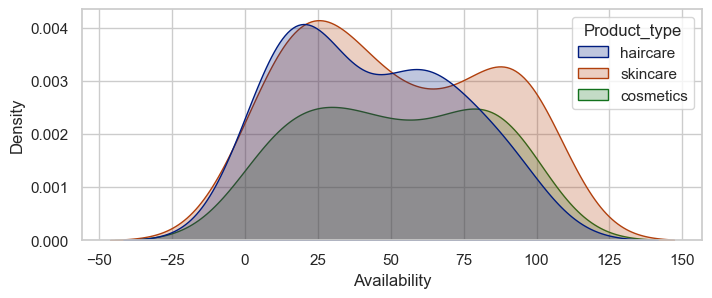

In [67]:
sns.kdeplot(data=supply,x='Availability',hue='Product_type',palette='dark',fill=True)

<Axes: xlabel='Number_of_products_sold', ylabel='Density'>

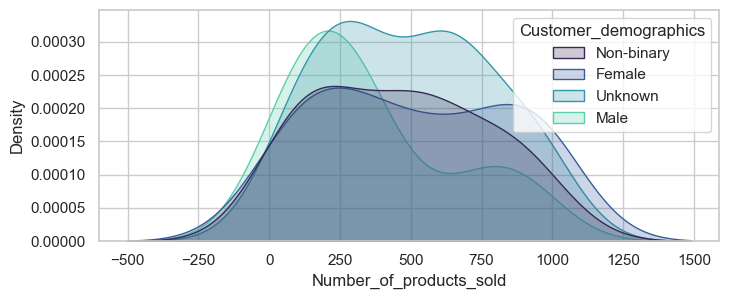

In [68]:
sns.kdeplot(data=supply,x='Number_of_products_sold',hue='Customer_demographics',palette='mako',fill=True)

<Axes: xlabel='Revenue_generated', ylabel='Density'>

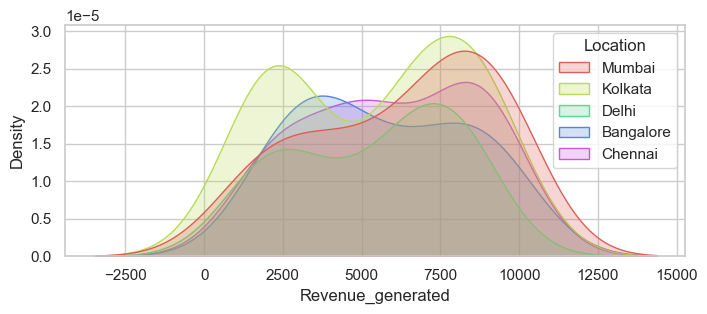

In [69]:
sns.kdeplot(data=supply,x='Revenue_generated',hue='Location',palette='hls',fill=True)

<Axes: xlabel='Stock_levels', ylabel='Density'>

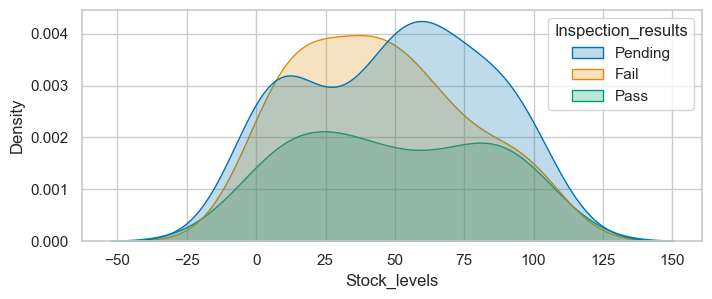

In [70]:
sns.kdeplot(data=supply,x='Stock_levels',hue='Inspection_results',palette='colorblind',fill=True)

<Axes: xlabel='Lead_times', ylabel='Density'>

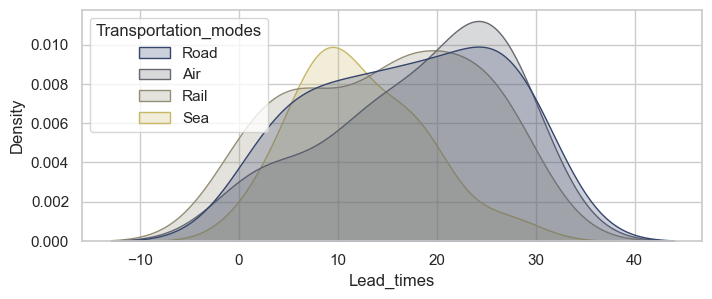

In [71]:
sns.kdeplot(data=supply,x='Lead_times',hue='Transportation_modes',palette='cividis',fill=True)

<Axes: xlabel='Order_quantities', ylabel='Density'>

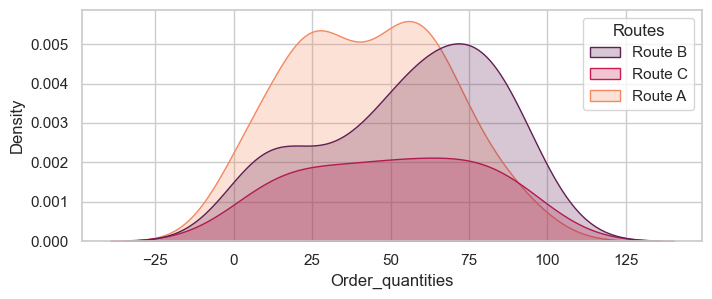

In [72]:
sns.kdeplot(data=supply,x='Order_quantities',hue='Routes',palette='rocket',fill=True)

<Axes: xlabel='Lead_time', ylabel='Density'>

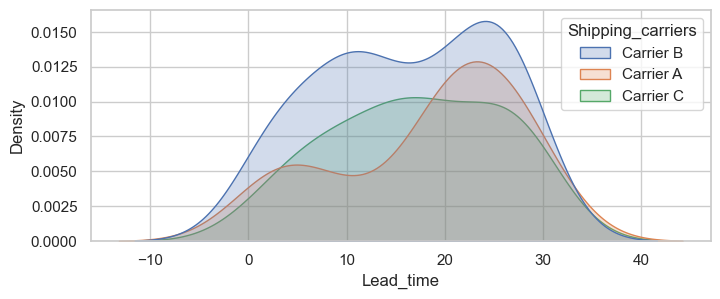

In [73]:
sns.kdeplot(data=supply,x='Lead_time',hue='Shipping_carriers',palette='deep',fill=True)

<Axes: xlabel='Production_volumes', ylabel='Density'>

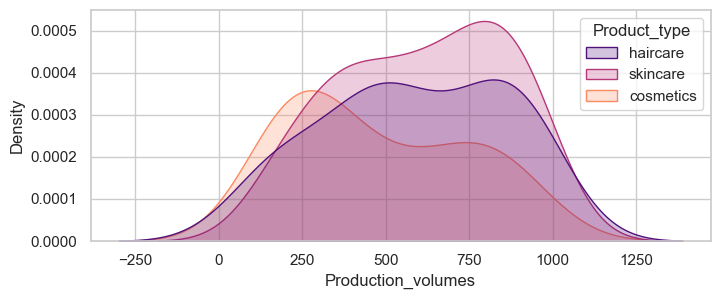

In [74]:
sns.kdeplot(data=supply,x='Production_volumes',hue='Product_type',palette='magma',fill=True)

<Axes: xlabel='Manufacturing_lead_time', ylabel='Density'>

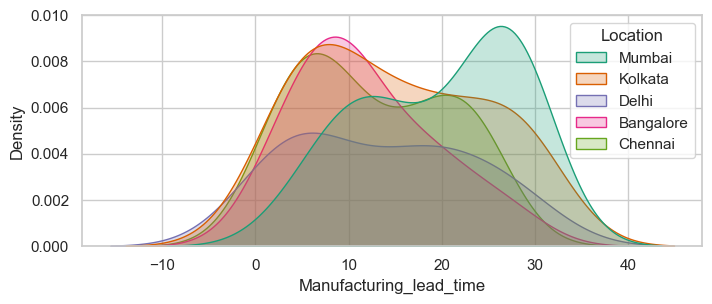

In [75]:
sns.kdeplot(data=supply,x='Manufacturing_lead_time',hue='Location',palette='Dark2',fill=True)

<Axes: xlabel='Costs', ylabel='Density'>

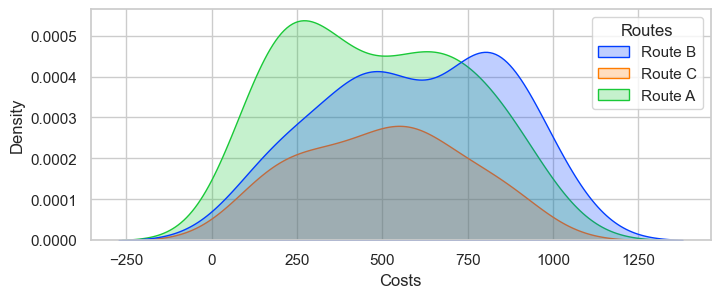

In [76]:
sns.kdeplot(data=supply,x='Costs',hue='Routes',palette='bright',fill=True)